In [103]:
from scipy.integrate import quad
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams.keys()
plt.rcParams['figure.figsize']=10, 8
# %matplotlib notebook
import mpmath as mp
from mpmath import *
mp.dps = 500
lnMpinGev = mp.mpf('42.334')
Mp = mp.exp(lnMpinGev)
def define_plot_resolution():
    """
    This function allow to define the resolution of a matplotlib plot on a way
    wich is device independent. Put this before saving any of your plot to get
    homogeneous resolution.
    """

    fig = plt.gcf()  # get current figure

    DPI = fig.get_dpi()
#     fig.set_size_inches(1920.0 / float(DPI), 1080.0 / float(DPI))
    fig.set_size_inches(12, 8)
    ax = plt.gca()
    for tickLabel in ax.get_xticklabels()+ax.get_yticklabels():
        tickLabel.set_fontsize(20)
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.yaxis.offsetText.set_fontsize(20)
    ax.xaxis.offsetText.set_fontsize(20)
    return

Analytique

In [104]:
# def mphi(phi, phigut, mphigut):
#     return mp.sqrt((mp.mpf('2')*mphigut**mp.mpf('2') - mphigut**mp.mpf('2')/(mp.mpf('1') - mp.log(phi/phigut)/(mp.mpf('48')*mp.pi))**mp.mpf('2') + mp.mpf('1')/mp.mpf('11')*(mphigut**mp.mpf('2') - mphigut**mp.mpf('2')/(mp.mpf('1') - (mp.mpf('11')*mp.log(phi/phigut))/(mp.mpf('80')*mp.pi))**2)))

# def lambda6(phi, phigut, lambda6gut):
#     return (lambda6gut**mp.mpf('2')*(mp.mpf('1') - (mp.mpf('11')*mp.log(phi/phigut))/(mp.mpf('80')*mp.pi))**(mp.mpf('6')/mp.mpf('11'))*(mp.mpf('1') - mp.log(phi/phigut)/(mp.mpf('48')*mp.pi))**mp.mpf('6'))**mp.mpf('0.5')

# def A6(phi, phigut, mphigut, A6gut):
#     return (A6gut + mp.mpf('6')/mp.mpf('11') * (mphigut - mphigut/(mp.mpf('1') - (mp.mpf('11')*mp.log(phi/phigut))/(mp.mpf('80')*mp.pi))) + mp.mpf('6')*(mphigut - mphigut/(mp.mpf('1') - mp.log(phi/phigut)/(mp.mpf('48')*mp.pi))))
    
# def Vrge(phi, mphi_func, A6_func, lambda6_func, phigut, mphigut, A6gut, lambda6gut):
#     lambda6 = lambda6_func(phi, phigut, lambda6gut)
#     mphi = mphi_func(phi, phigut,mphigut)
#     A6 = A6_func(phi, phigut, mphigut, Agut)
#     V = mp.mpf('0.5')*mphi**mp.mpf('2')*phi**mp.mpf('2')-lambda6*A6/(mp.mpf('6')*Mp**mp.mpf('3'))*phi**mp.mpf('6')+lambda6**mp.mpf('2')*phi**mp.mpf('10')/Mp**mp.mpf('6')
#     return V

mphigut = 1e7
lambdagut = 1
g1gut = np.sqrt(np.pi/10)
g2gut = np.sqrt(np.pi/6)
xi = 1
m1gut = xi * mphigut
m2gut = m1gut
Agut = np.sqrt(40)*1e7
phi = 1e14
phi_gut = mp.mpf('3e16')
phi_list = np.linspace(2*float(phi_gut)-phi, phi, 1000)


LLe no Yukawa Allahverdi 2007

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999946072198D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999946072198D+17   r2 =  0.2950254911590D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999946072198D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999946072198D+17   r2 =  0.2914086100297D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999946072198D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999946072198D+17   r2 =  0.2950254911590D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999946072198D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999946072198D+17   r2 =  0.2914086100297D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999934088242D+17
      t not in interval tcur - hu (= r1) to

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999940199402D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999940199402D+17   r2 =  0.2952640613927D+17
[66224614.86158005]
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999940199402D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999940199402D+17   r2 =  0.2961937113621D+17
[10444782.12588348]
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999940199402D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999940199402D+17   r2 =  0.2970578350756D+17
[1.43334686]


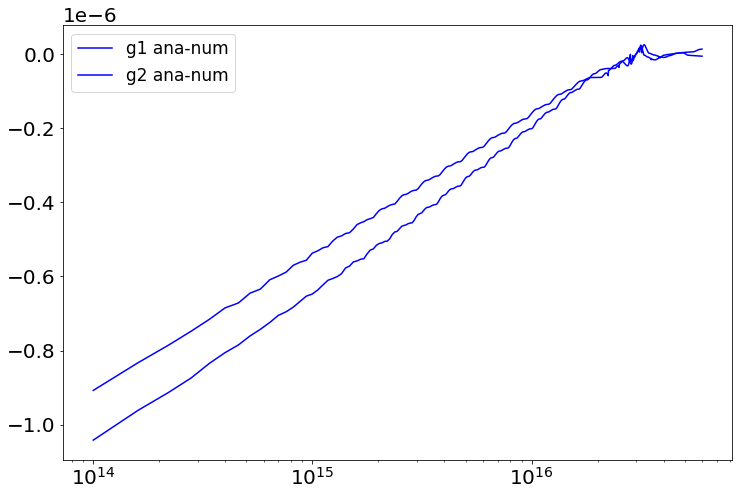

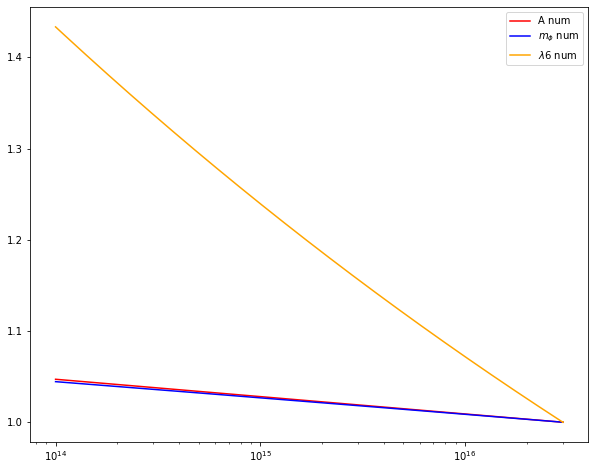

In [107]:
phi_gut = mp.mpf('3e16')
phi = 1e14

phi_list = np.linspace(2*float(phi_gut)-phi, phi, 1000)


#################### TOUT NUMERIQUE #########################


def g1(phi):
    dg1dphi = lambda g1, phi : 11/(16*np.pi**2*phi)*g1**3
    phi_integ = np.linspace(float(phi_gut), phi, 1000)
    return odeint(dg1dphi,  g1gut,phi_integ)[-1]
def g2(phi):
    dg2dphi = lambda g2, phi : 1/(16*np.pi**2*phi)*g2**3
    phi_integ = np.linspace(float(phi_gut), phi, 1000)
    return odeint(dg2dphi,  g2gut,phi_integ)[-1]
def m1(phi, g1phi):
    return m1gut*(g1phi/g1gut)**2
def m2(phi, g2phi):
    return m2gut*(g2phi/g2gut)**2

def mphi(phi, mphigut):
    g1phi, g2phi = g1(phi), g2(phi)
    dmphi2dphi = lambda mphi, phi : -1/(6*np.pi**2*phi)*(3/2*m2(phi, g2phi)**2*g2phi**2+3/2*m1(phi, g1phi)**2*g1phi**2)
    phi_integ = np.linspace(float(phi_gut), phi, 100000)
    mphi_list = odeint(dmphi2dphi, mphigut**2, phi_integ)
    plt.semilogx(phi_integ, np.sqrt(mphi_list)/mphigut, label = r'$m_\phi$ num', color='blue')
    return np.sqrt(mphi_list[-1])

def A(phi, Agut):
    g1phi, g2phi = g1(phi), g2(phi)
    dAdphi = lambda A, phi : -1/(2*np.pi**2*phi)*(3/2*m2(phi, g2phi)*g2phi**2+3/2*m1(phi, g1phi)*g1phi**2)
    phi_integ = np.linspace(float(phi_gut), phi, 100000)
    A_list = odeint(dAdphi, Agut, phi_integ)
    plt.semilogx(phi_integ, A_list/Agut, label='A num', color='red')
    return A_list[-1]

def lambda6(phi, lambdagut):
    g1phi, g2phi = g1(phi), g2(phi)
    dlambdadphi = lambda lambda6, phi : -lambda6/(4*np.pi**2*phi)*(3/2**g2phi**2+3/2*g1phi**2)
    phi_integ = np.linspace(float(phi_gut), phi, 100000)
    lambda_list = odeint(dlambdadphi, lambdagut, phi_integ)
    plt.semilogx(phi_integ, lambda_list/lambdagut, label=r'$\lambda6$ num', color='orange')
    return lambda_list[-1]



plt.figure()
g1_, g2_, g1__, g2__,g1_diff,g2_diff = [], [], [], [], [], []
b1, b2 = mp.mpf('11')/(8*mp.pi**2), mp.mpf('1')/(8*mp.pi**2)

for mu in phi_list:
    g1_.append(g1gut/(mp.sqrt(1-b1*g1gut**2*mp.log(mu/phi_gut))))
    g2_.append(g2gut/(mp.sqrt(1-b2*g2gut**2*mp.log(mu/phi_gut))))
    g1__.append(g1(mu))
    g2__.append(g2(mu))
    g1_diff.append(g1(mu)-g1gut/(mp.sqrt(1-b1*g1gut**2*mp.log(mu/phi_gut))))
    g2_diff.append(g2(mu)-g2gut/(mp.sqrt(1-b2*g2gut**2*mp.log(mu/phi_gut))))
plt.semilogx(phi_list, g1_diff, label='g1 ana-num', color='blue')
plt.semilogx(phi_list, g2_diff, label='g2 ana-num', color='blue')
#plt.semilogx(phi_list, g1__, label='g1 num', color='blue', linestyle=':')
#plt.semilogx(phi_list, g2__, label='g2 num', color='red', linestyle=':')
plt.legend(fontsize=17)
define_plot_resolution()

plt.figure()
print(A(phi, Agut))
print(mphi(phi, mphigut))
print(lambda6(phi, lambdagut))
plt.legend()

def Vrge_params(mu, xi, mphi_GUT, A6_GUT, lambda6_GUT):
    mu_GUT = mp.mpf('3e16')
    b1, b2 = mp.mpf('11')/(8*mp.pi**2), mp.mpf('1')/(8*mp.pi**2)
    g1_GUT, g2_GUT = mp.sqrt(mp.pi/10), mp.sqrt(mp.pi/6)
    g1, g2 = g1_GUT/(mp.sqrt(1-b1*g1_GUT**2*mp.log(mu/mu_GUT))), g2_GUT/(mp.sqrt(1-b2*g2_GUT**2*mp.log(mu/mu_GUT)))
    m1, m2 = mphi_GUT*xi*(g1/g1_GUT)**2,  mphi_GUT*xi*(g2/g2_GUT)**2
    mphi_GUT2 = mphi_GUT**2
    mphi2 = mphi_GUT2+(mphi_GUT*xi)**2-m2**2+mp.mpf('1')/mp.mpf('11')*((mphi_GUT*xi)**2-m1**2)
    A6 = A6_GUT+6*(mphi_GUT*xi-m2)+mp.mpf('6')/mp.mpf('11')*(mphi_GUT*xi-m1)
    lambda6 = lambda6_GUT*(g2_GUT/g2)**mp.mpf('6')*(g1_GUT/g1)**(mp.mpf('6')/mp.mpf('11'))
    phi = mu
    return 0.5*mphi2*phi**2-lambda6*A6/(6*Mp**3)*phi**6+lambda6**2*phi**10/Mp**6, mp.sqrt(mphi2), A6, lambda6


#################### TOUT ANALYTIQUE #########################

def mphiA(phi, phigut, mphigut):
    return mp.sqrt((mp.mpf('2')*mphigut**mp.mpf('2') - mphigut**mp.mpf('2')/(mp.mpf('1') - mp.log(phi/phigut)/(mp.mpf('48')*mp.pi))**mp.mpf('2') + mp.mpf('1')/mp.mpf('11')*(mphigut**mp.mpf('2') - mphigut**mp.mpf('2')/(mp.mpf('1') - (mp.mpf('11')*mp.log(phi/phigut))/(mp.mpf('80')*mp.pi))**2)))

def lambda6A(phi, phigut, lambda6gut):
    return mp.sqrt(lambda6gut**mp.mpf('2')*(mp.mpf('1') - (mp.mpf('11')*mp.log(phi/phigut))/(mp.mpf('80')*mp.pi))**(mp.mpf('6')/mp.mpf('11'))*(mp.mpf('1') - mp.log(phi/phigut)/(mp.mpf('48')*mp.pi))**mp.mpf('6'))

def A6A(phi, phigut, mphigut, A6gut):
    return (A6gut + mp.mpf('6')/mp.mpf('11') * (mphigut - mphigut/(mp.mpf('1') - (mp.mpf('11')*mp.log(phi/phigut))/(mp.mpf('80')*mp.pi))) + mp.mpf('6')*(mphigut - mphigut/(mp.mpf('1') - mp.log(phi/phigut)/(mp.mpf('48')*mp.pi))))


 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999999700698D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999999700698D+17   r2 =  0.2998503189238D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999999700698D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999999700698D+17   r2 =  0.2998503189238D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999999700698D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999999700698D+17   r2 =  0.2998503189238D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999946072198D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999946072198D+17   r2 =  0.2950254911590D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999946072198D+17
      t not in interval tcur - hu (= r1) to

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999754328903D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999754328903D+17   r2 =  0.2949964437840D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999754328903D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999754328903D+17   r2 =  0.2913597436598D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999997545721D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999997545721D+17   r2 =  0.2987726151737D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999754328903D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999754328903D+17   r2 =  0.2949964437840D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999754328903D+17
      t not in interval tcur - hu (= r1) to

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999995271024D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999995271024D+17   r2 =  0.2976350389932D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999995271024D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999995271024D+17   r2 =  0.2976350389932D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999995271024D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999995271024D+17   r2 =  0.2976350389932D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2973955492708D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2973955492708D+17   r2 =  0.2947916193276D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2973955492708D+17
      t not in interval tcur - hu (= r1) to

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999993116047D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999993116047D+17   r2 =  0.2965781088316D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999993116047D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999993116047D+17   r2 =  0.2965573352431D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999993116047D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999993116047D+17   r2 =  0.2971203405016D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999992996326D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999992996326D+17   r2 =  0.2965770189688D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999992996326D+17
      t not in interval tcur - hu (= r1) to

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999987848327D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999987848327D+17   r2 =  0.2965494342730D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999987848327D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999987848327D+17   r2 =  0.2955924433321D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999987848327D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999987848327D+17   r2 =  0.2971044320518D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999987130001D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999987130001D+17   r2 =  0.2965467943869D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999987130001D+17
      t not in interval tcur - hu (= r1) to

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999981862281D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999981862281D+17   r2 =  0.2965305722220D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999981862281D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999981862281D+17   r2 =  0.2955692265911D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999981862281D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999981862281D+17   r2 =  0.2970966760689D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999981143956D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999981143956D+17   r2 =  0.2965285889497D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999981143956D+17
      t not in interval tcur - hu (= r1) to

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999975277631D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999975277631D+17   r2 =  0.2965132155750D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999975277631D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999975277631D+17   r2 =  0.2955503979681D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999975277631D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999975277631D+17   r2 =  0.2970915149967D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999975157910D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999975157910D+17   r2 =  0.2965128968306D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999975157910D+17
      t not in interval tcur - hu (= r1) to

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999968573259D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999968573259D+17   r2 =  0.2964952802768D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999968573259D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999968573259D+17   r2 =  0.2955326738980D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999968573259D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999968573259D+17   r2 =  0.2970875338899D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999968453538D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999968453538D+17   r2 =  0.2964949359599D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999968453538D+17
      t not in interval tcur - hu (= r1) to

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999962587213D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999962587213D+17   r2 =  0.2964771587222D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999962587213D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999962587213D+17   r2 =  0.2955156617851D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999962587213D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999962587213D+17   r2 =  0.2970843421730D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999961868888D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999961868888D+17   r2 =  0.2964747518365D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999961868888D+17
      t not in interval tcur - hu (= r1) to

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999955882842D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999955882842D+17   r2 =  0.2964518337333D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999955882842D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999955882842D+17   r2 =  0.2954926721918D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999955882842D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999955882842D+17   r2 =  0.2970806997855D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999955164517D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999955164517D+17   r2 =  0.2964486189132D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999955164517D+17
      t not in interval tcur - hu (= r1) to

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999950016517D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999950016517D+17   r2 =  0.2964205973820D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999950016517D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999950016517D+17   r2 =  0.2954648365754D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999950016517D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999950016517D+17   r2 =  0.2970769495099D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999949896796D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999949896796D+17   r2 =  0.2964197995249D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999949896796D+17
      t not in interval tcur - hu (= r1) to

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999943312146D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999943312146D+17   r2 =  0.2963508048379D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999943312146D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999943312146D+17   r2 =  0.2954033094557D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999943312146D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999943312146D+17   r2 =  0.2970701080140D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999943192425D+17
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.2999943192425D+17   r2 =  0.2963485812796D+17
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.2999943192425D+17
      t not in interval tcur - hu (= r1) to

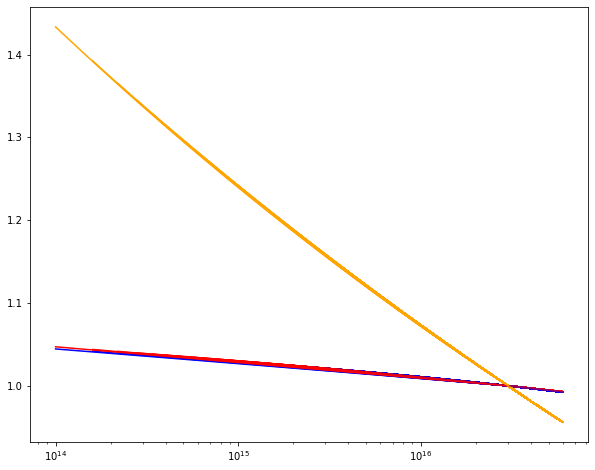

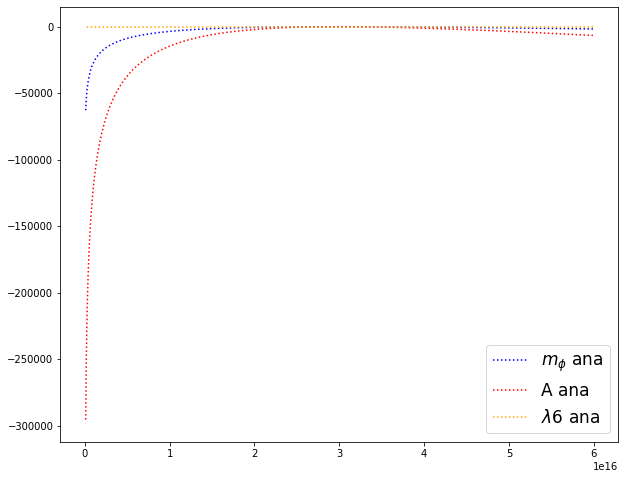

In [109]:


mphi_list, A_list, lambda_list = [],[],[]
for phi in phi_list:
    mphi_list.append(mphi(phi, mphigut)-mphiA(phi, phi_gut, mphigut))
    A_list.append(A(phi, Agut)-A6A(phi, phi_gut, mphigut, Agut))
    lambda_list.append(lambda6(phi, lambdagut)-lambda6A(phi, phi_gut, lambdagut))
    


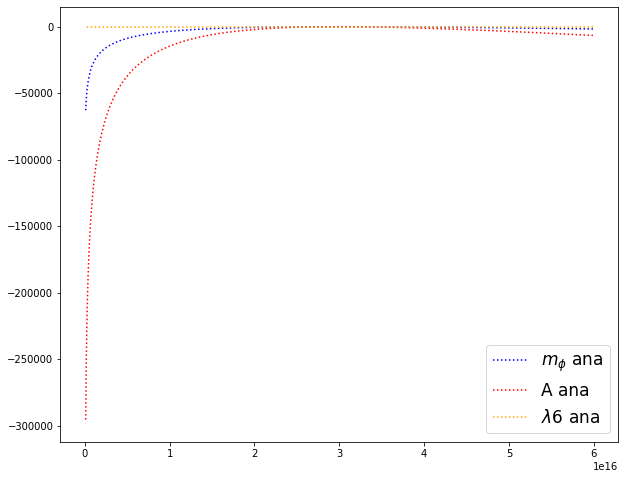

In [110]:

plt.figure()

plt.plot(phi_list, np.array(mphi_list), color='blue', linestyle = ':', label=r'$m_\phi$ ana')
plt.plot(phi_list, np.array(A_list), color='red', linestyle = ':', label='A ana')
plt.plot(phi_list, (np.array(lambda_list)), color='orange', linestyle = ':', label =r'$\lambda6$ ana')

plt.legend(fontsize=17)



In [122]:
def mphi_ana(phi, phigut, mphigut):
    return mp.sqrt((mp.mpf('2')*mphigut**mp.mpf('2') - mphigut**mp.mpf('2')/(mp.mpf('1') - mp.log(phi/phigut)/(mp.mpf('48')*mp.pi))**mp.mpf('2') + mp.mpf('1')/mp.mpf('11')*(mphigut**mp.mpf('2') - mphigut**mp.mpf('2')/(mp.mpf('1') - (mp.mpf('11')*mp.log(phi/phigut))/(mp.mpf('80')*mp.pi))**2)))

def lambda6_ana(phi, phigut, lambda6gut):
    return mp.sqrt(lambda6gut**mp.mpf('2')*(mp.mpf('1') - (mp.mpf('11')*mp.log(phi/phigut))/(mp.mpf('80')*mp.pi))**(mp.mpf('6')/mp.mpf('11'))*(mp.mpf('1') - mp.log(phi/phigut)/(mp.mpf('48')*mp.pi))**mp.mpf('6'))

def A6_ana(phi, phigut, mphigut, A6gut):
    return (A6gut + mp.mpf('6')/mp.mpf('11') * (mphigut - mphigut/(mp.mpf('1') - (mp.mpf('11')*mp.log(phi/phigut))/(mp.mpf('80')*mp.pi))) + mp.mpf('6')*(mphigut - mphigut/(mp.mpf('1') - mp.log(phi/phigut)/(mp.mpf('48')*mp.pi))))

y0_g1=g1gut
y0_g2=g2gut
y0_A=Agut
y0_mphi2=mphigut**2
y0_lambda=lambdagut

def g2_eqdiff(x,y):
    return 1/(16*np.pi**2*x)*y**3

def g1_eqdiff(x,y):
    return 11/(16*np.pi**2*x)*y**3

def m1_eq(phi, g1phi):
    return m1gut*(g1phi/g1gut)**2

def m2_eq(phi, g2phi):
    return m2gut*(g2phi/g2gut)**2

def A_deriv(x, y):
    g1phi=rk4(g1_eqdiff,x0,y0_g1,x,step)
    g2phi=rk4(g2_eqdiff,x0,y0_g2,x,step)
    res=-1/(2*np.pi**2*x)*(3/2*m2_eq(x, g2phi)*g2phi**2+3/2*m1_eq(x, g1phi)*g1phi**2)
    return(res)


def mphi2_deriv(x, y):
    #print("step",step)
    g1phi=rk4(g1_eqdiff,x0,y0_g1,x,step)
    g2phi=rk4(g2_eqdiff,x0,y0_g2,x,step)
    res=-1/(6*np.pi**2*x)*(3/2*m2_eq(x, g2phi)**2*g2phi**2+3/2*m1_eq(x, g1phi)**2*g1phi**2)
    return(res)

def lambda_deriv(x, y):
    g1phi=rk4(g1_eqdiff,x0,y0_g1,x,step)
    g2phi=rk4(g2_eqdiff,x0,y0_g2,x,step)
    res=-y/(4*np.pi**2*x)*(3/2**g2phi**2+3/2*g1phi**2)
    return(res)


def rk4(f,x0,y0,xn,n):
    # Calculating step size
    h = (-x0+xn)/mp.mpf(n)
    
    #print('\n--------SOLUTION--------')
    #print('-------------------------')    
    #print('x0\ty0\tyn')
    #print('-------------------------')
    for i in range(n):
        k1 = h * (f(x0, y0))
        k2 = h * (f((x0+h/2), (y0+k1/2)))
        k3 = h * (f((x0+h/2), (y0+k2/2)))
        k4 = h * (f((x0+h), (y0+k3)))
        k = (k1+2*k2+2*k3+k4)/6
        yn = y0 + k
        #print('%.4f\t%.4f\t%.4f'% (x0,y0,yn) )
        #print('-------------------------')
        y0 = yn
        x0 = x0+h
    
    #print((xn,yn))
    return(yn)

x0=phi_gut
xn=1e16
step1=100
#step2=500
step=step1
plt.figure()
g2_NumNew,g2_diffNew,g2_diff = [], [],[]
g2_NumNew2,g2_diffNew2 = [], []
A_diff,mphi2_diff,lambda_diff = [], [],[]


phi_list = mp.linspace(phi_gut,mp.mpf("1e14"), 100)
i=0
for mu in phi_list[:-1]:
    print(mu)
    res_g2=rk4(g2_eqdiff,x0,y0_g2,mu,step2)
    res_g1=rk4(g1_eqdiff,x0,y0_g1,mu,step2)
    g2_NumNew2.append(res_g2)
    g2_diffNew2.append(res_g2-g2gut/(mp.sqrt(1-b2*g2gut**2*mp.log(mu/phi_gut))))
    
    res_lambda=rk4(lambda_deriv,x0,y0_lambda,mu,step)
    lambda_diff.append(res_lambda-lambda6_ana(mu, phi_gut,lambdagut))
    res_A=rk4(A_deriv,x0,y0_A,mu,step)
    A_diff.append(res_A-A6_ana(mu, phi_gut, mphigut, Agut))
    res_mphi2=rk4(mphi2_deriv,x0,y0_mphi2,mu,step)
    mphi2_diff.append(mp.sqrt(res_mphi2)-mp.sqrt(mphi_ana(mu, phi_gut, mphigut)**2))
    print(mp.sqrt(res_mphi2)-mp.sqrt(mphi_ana(mu, phi_gut, mphigut)**2))
    
    mphi_list.append(res_mphi2)
    A_list.append(res_A)
    lambda_list.append(res_lambda)
    
    x0=mu
    y0_lambda=res_lambda
    y0_mphi2=res_mphi2
    y0_A=res_A
    y0_g2=res_g2
    y0_g1=res_g1
    i+=1
    g2_diff.append(g2(float(mu))-g2gut/(mp.sqrt(1-b2*g2gut**2*mp.log(mu/phi_gut))))
    

30000000000000000.0
0.0
29697979797979797.97979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979798
0.00000000000001320271179609658446532519234760233640350791942758852670112989727027854631832939450332702113702686824518386282889501351139185826996399106964413954464601199103840208328251469786300915826706756703785719928670380160649976085797416260898164651759563407655750156728384909519654729509262494545231652447924128298645496088017307415229181495545268385982901071829621725645394911686632915865821855724908830390747570693255646193408534234251250489618639636932908085737160304

0.00000000000012228859235906813101043858455538593348748045750897623982235874938310936508222968151829440716940290862825768371767713498170673612026509612878681135487197776531809038393788839085021479113257231088096121109592022678178518320708185376478217962475205691650063652851016185723038768488381899217040557079613295070639890787965071074622789610869102565454345522648027491943753060108438692664135592291778017392522683826873841327006603319675301381680933925675328817897373913860076842027231822955982819665798705728
26979797979797979.79797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797979797

KeyboardInterrupt: 

<Figure size 720x576 with 0 Axes>

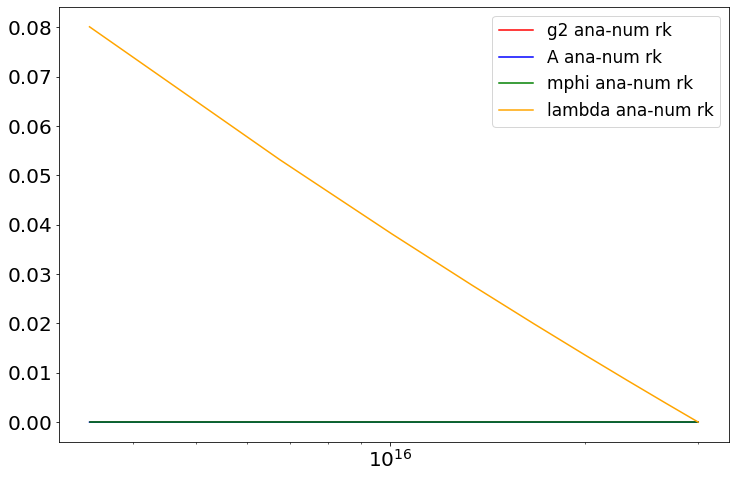

In [97]:
plt.figure()
plt.semilogx(phi_list[:-1], g2_diffNew2, label='g2 ana-num rk', color='red')
plt.semilogx(phi_list[:-1], A_diff, label='A ana-num rk', color='blue')
plt.semilogx(phi_list[:-1], mphi2_diff, label='mphi ana-num rk', color='green')
plt.semilogx(phi_list[:-1], lambda_diff, label='lambda ana-num rk', color='orange')
plt.legend(fontsize=17)
define_plot_resolution()




In [120]:
y0_g1=g1gut
y0_g2=g2gut
y0_A=Agut
y0_mphi2=mphigut**2
y0_lambda=lambdagut
phi_list = mp.linspace(phi_gut,mp.mpf("1e14"), 400)
i=0

step=100


def rk4(f,x0,y0,xn,n):
    # Calculating step size
    h = (-x0+xn)/mp.mpf(n)
    
    #print('\n--------SOLUTION--------')
    #print('-------------------------')    
    #print('x0\ty0\tyn')
    #print('-------------------------')
    for i in range(n):
        k1 = h * (f(x0, y0))
        k2 = h * (f((x0+h/2), (y0+k1/2)))
        k3 = h * (f((x0+h/2), (y0+k2/2)))
        k4 = h * (f((x0+h), (y0+k3)))
        k = (k1+2*k2+2*k3+k4)/6
        yn = y0 + k
        #print('%.4f\t%.4f\t%.4f'% (x0,y0,yn) )
        #print('-------------------------')
        y0 = yn
        x0 = x0+h
    
    #print((xn,yn))
    return(yn)


def lambda_deriv(x, y):
    g1phi=rk4(g1_eqdiff,x0,y0_g1,x,step)
    g2phi=rk4(g2_eqdiff,x0,y0_g2,x,step)
    res=-y/(4*np.pi**2*x)*(3/2**g2phi**2+3/2*g1phi**2)
    return(res)

for mu in phi_list[:-39]:
    print(mu)
#    res_g2=rk4(g2_eqdiff,x0,y0_g2,mu,step)
#    res_g1=rk4(g1_eqdiff,x0,y0_g1,mu,step)
    res_lambda=rk4(lambda_deriv,x0,y0_lambda,mu,step)
    #print(res_lambda-lambda6_ana(mu, phi_gut,lambdagut))
    print(lambdagut-res_lambda)
    x0=mu
    y0_lambda=res_lambda
    y0_mphi2=res_mphi2
    y0_A=res_A
    y0_g2=res_g2
    y0_g1=res_g1
    i+=1


30000000000000000.0
0.002137043358592704910698883188312439766830744252238180699277751117292995873803297343578800679449985564554459156286075597928155000131687435455704534217552931406222670793195175094839330012148010497112092391957050829926579272901937851989086600149908087554575695398454300361862561172293665833305539138353974613026139025692454033931464182981333638763747744882713487146670472352164394252808591047991896394767383048481374241537386789102577847922704576148528105106718070982988337764887903900100529386460152486
29925062656641604.01002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506265664160401002506

KeyboardInterrupt: 

In [ ]:
20033333333333333
